In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
data=pd.read_csv('/content/winequality-red.csv')

In [6]:
data.shape

(1599, 12)

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.value_counts('quality')

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

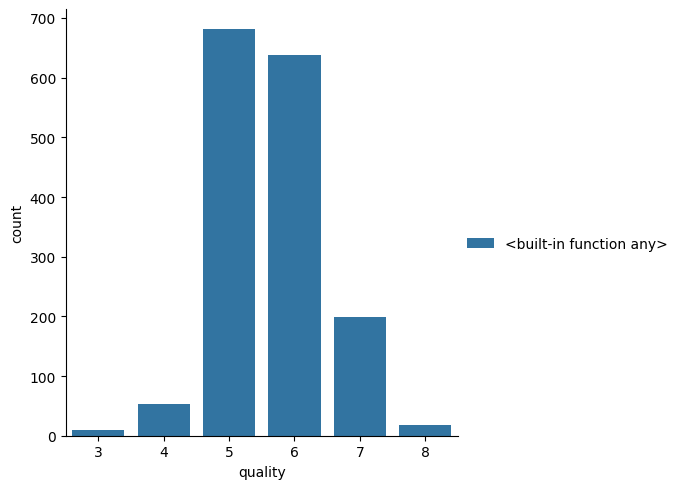

In [10]:
sns.catplot(x='quality',data=data,kind='count',hue=any)

<ipython-input-11-b2b8c7fd4930>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y='alcohol',data=data,palette='deep')


<Axes: xlabel='quality', ylabel='alcohol'>

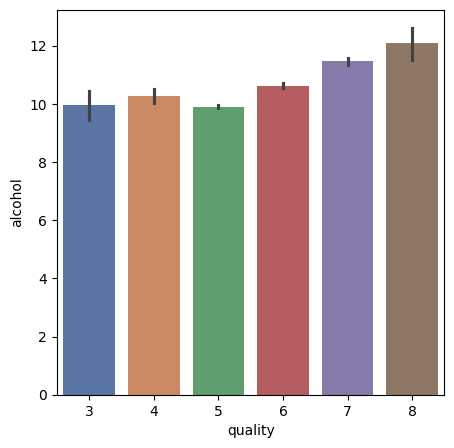

In [11]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=data,palette='deep')

<ipython-input-12-ea647093f807>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality',y='citric acid',data=data,palette='deep')


<Axes: xlabel='quality', ylabel='citric acid'>

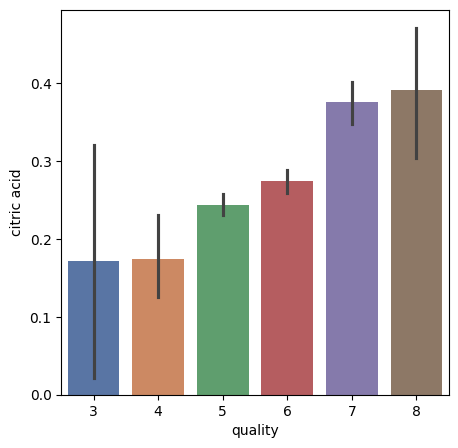

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=data,palette='deep')

In [13]:
correlation=data.corr()

<Axes: >

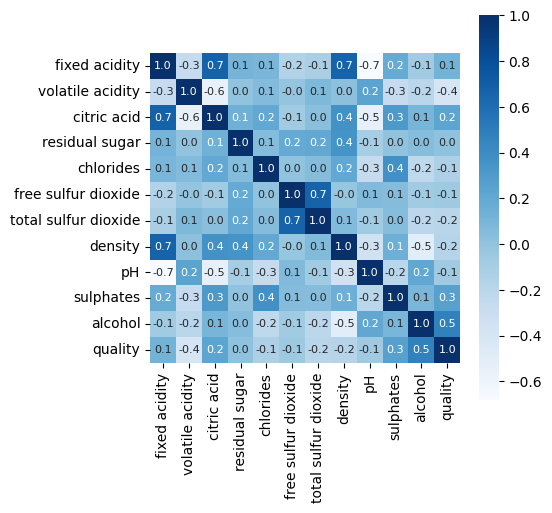

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,cmap='Blues',square=True,fmt='.1F',annot=True,annot_kws={'size':8})


In [15]:
x=data.drop(columns=['quality'],axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
scaler.fit(x)
std=scaler.transform(x)
print(std)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [22]:
x=std
y=data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [23]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [24]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
print(x.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [28]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
x_train_predict=model.predict(x_train)
x_train_acc=accuracy_score(x_train_predict,y_train)

x_test_predict=model.predict(x_test)
x_test_acc=accuracy_score(x_test_predict,y_test)

In [31]:
print(x_train_acc)
print(x_test_acc)

1.0
0.915625


In [35]:
input=(11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8)
input_arr=np.asarray(input)
input_res=input_arr.reshape(1,-1)
std_data=scaler.transform(input_res)
prediction=model.predict(std_data)
if(prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')
print(prediction)

Bad Quality Wine
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
